# Аналитика с использованием SQL

Требуется провести анализ базы данных сервиса для чтения книг по подписке результаты которого будут использованы при формировании ценностного предложения для нового продукта:

* сколько книг вышло после 1 января 2000 года
* для каждой книги рассчитать количество обзоров и среднюю оценку
* определить издательство, которое выпустило наибольшее число книг (все книги за исключением брошюр)
* определить автора с самой высокой средней оценкой книг (учитывать только книги с 50 и более оценками)
* посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок

Импортируем необходимые библиотеки

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

## Настройка подключения

Создадим словарь содержащий параметры для подключения в базе данных

In [2]:
db_config = {'user': '#####',
             'pwd': '#####',
             'host': '#####',
             'port': #####, 
             'db': '#####'}

Сформируем строку подключения

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])

Создадим движок который, используя строку подключения, будет передавать наш запрос серверу

In [4]:
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Определим специальную функцию для упрощения работы с движком которая на вход будет принимать SQL-запрос а возвращать ответ сервера

In [5]:
def select(sql):
    return pd.read_sql(sql, con=engine)

## Просмотр таблиц

### books

In [6]:
query = ''' SELECT
                * 
            FROM
                books                   
        '''
select(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


Таблица содержит данные о книгах:

* `book_id` — идентификатор книги
* `author_id` — идентификатор автора
* `title` — название книги
* `num_pages` — количество страниц
* `publication_date` — дата публикации книги
* `publisher_id` — идентификатор издателя

И включает записи о 1000 книг

### authors

In [7]:
query = ''' SELECT
                * 
            FROM
                authors 
        '''
select(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


В таблице хранятся данные об авторах:

* `author_id` — идентификатор автора
* `author` — имя автора

Их 636

### publishers

In [8]:
query = ''' SELECT 
                * 
            FROM 
                publishers 
        '''
select(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


Здесь хранятся данные об издательствах:

* `publisher_id` — идентификатор издательства
* `publisher` — название издательства

Всего 340 строк

### ratings

In [9]:
query = ''' SELECT
                * 
            FROM
                ratings 
        '''
select(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


Данная таблица хранит данные о пользовательских оценках книг:

* `rating_id` — идентификатор оценки
* `book_id` — идентификатор книги
* `username` — имя пользователя, оставившего оценку
* `rating` — оценка книги

Всего в нашем распоряжении имеются сведения в 6456 оценках

### reviews

In [10]:
query = ''' SELECT
                * 
            FROM 
                reviews 
        '''
select(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


Таблица включает в себя данные о пользовательских обзорах на книги:

* `review_id` — идентификатор обзора
* `book_id` — идентификатор книги
* `username` — имя пользователя, написавшего обзор
* `text` — текст обзора

Всего в нашей БД хранится 2793 пользовательских ревью

## SQL-запросы для поиска ответов на поставленные вопросы

### Количество книг вышедших после 1 января 2000 года

In [11]:
query_task_1 = ''' SELECT 
                       COUNT(*)
                   FROM
                       books 
                   WHERE 
                       publication_date > '2000-01-01'
               '''
select(query_task_1)

,count
0,819


В базе данных сохранены сведения о 819 книгах выпущенных после 1 января 2000 года

### Количество обзоров и средняя оценка для каждой книги

In [12]:
query_task_2 = ''' SELECT 
                       books.book_id,
                       title,
                       review_count,
                       ROUND(rating_avg, 2) AS rating_avg
                   FROM 
                       books
                   LEFT JOIN 
                       (SELECT 
                            COUNT(review_id) AS review_count, 
                            book_id  
                        FROM 
                            reviews
                        GROUP BY
                            book_id
                        ) AS reviews ON books.book_id = reviews.book_id
                   LEFT JOIN 
                       (SELECT 
                            AVG(rating) AS rating_avg, 
                            book_id 
                        FROM 
                            ratings
                        GROUP BY
                            book_id
                        ) AS ratings ON books.book_id = ratings.book_id
               '''
select(query_task_2)

,book_id,title,review_count,rating_avg
0,652,The Body in the Library (Miss Marple #3),2.0,4.50
1,273,Galápagos,2.0,4.50
2,51,A Tree Grows in Brooklyn,5.0,4.25
3,951,Undaunted Courage: The Pioneering First Missio...,2.0,4.00
4,839,The Prophet,4.0,4.29
...,...,...,...,...
995,64,Alice in Wonderland,4.0,4.23
996,55,A Woman of Substance (Emma Harte Saga #1),2.0,5.00
997,148,Christine,3.0,3.43
998,790,The Magicians' Guild (Black Magician Trilogy #1),2.0,3.50


Для каждой книги рассчитаны необходимые показатели, построим гистограмму распределения оценок

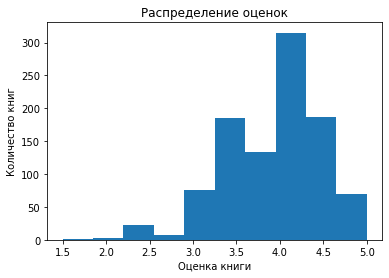

In [13]:
plt.hist(select(query_task_2)['rating_avg'])
plt.title('Распределение оценок')
plt.xlabel('Оценка книги')
plt.ylabel('Количество книг')
plt.show()

Купол распределения расположен на между оценками 4.0 и 4.5, само распределение похоже на нормальное

Построим диаграмму распределения количества обзоров

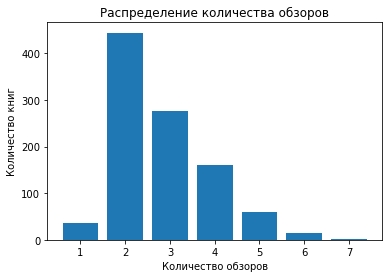

In [14]:
plt.bar(height=select(query_task_2)['review_count'].value_counts().values,
        x=select(query_task_2)['review_count'].value_counts().index)
plt.title('Распределение количества обзоров')
plt.xlabel('Количество обзоров')
plt.ylabel('Количество книг')
plt.show()

В основном на каждую книгу приходится по 2-3 обзора, количество обзоров может напрамую зависеть от популярности книги и, косвенно, от ее средней оценке, проверим, есть ли такая зависиомсть

In [15]:
select(query_task_2)['review_count'].corr(select(query_task_2)['rating_avg'])

0.0191126042494019

Сила корреляции очень слабая

### Издательство, которое выпустило наибольшее число книг (за исключение брошюр)

In [16]:
query_task_3 = ''' SELECT 
                       publisher,
                       books_over_50_page_count
                   FROM 
                       publishers
                   RIGHT JOIN
                       (SELECT
                            publisher_id,
                            COUNT(book_id) AS books_over_50_page_count
                        FROM
                            books
                        WHERE
                            num_pages > 50
                        GROUP BY
                           publisher_id
                        ) AS books on publishers.publisher_id = books.publisher_id
                    ORDER BY
                        books_over_50_page_count DESC
                    LIMIT 1
               '''
select(query_task_3)

,publisher,books_over_50_page_count
0,Penguin Books,42


Издательсвом, выпустившим наибольшее количество книг, исходя из имющихся данных, является **Penguin Books**, им было выпущено 42 книги

### Автор с самой высокой средней оценкой книг (учитываются только книги с 50 и более оценками)

In [17]:
query_task_4 = ''' SELECT
                       authors.author_id,
                       authors.author,
                       ROUND(top_author.avg, 2) AS average_rating
                   FROM
                       authors
                   RIGHT JOIN
                       (SELECT
                            author_id,
                            AVG(rating_avg)
                        FROM
                            books
                        LEFT JOIN 
                            (SELECT 
                                 AVG(rating) AS rating_avg, 
                                 book_id 
                             FROM 
                                 ratings
                             GROUP BY
                                 book_id
                        ) AS ratings ON books.book_id = ratings.book_id
                        WHERE
                            books.book_id IN (SELECT
                                                  books.book_id
                                              FROM 
                                                  books
                                              LEFT JOIN ratings ON books.book_id = ratings.book_id
                                              GROUP BY
                                                  books.book_id
                                              HAVING
                                                  COUNT(rating_id) >= 50)
                        GROUP BY
                            author_id
                        ORDER BY
                            avg DESC
                        LIMIT 1
                        ) AS top_author ON authors.author_id = top_author.author_id
               '''
select(query_task_4)

,author_id,author,average_rating
0,236,J.K. Rowling/Mary GrandPré,4.28


Автором с самым высоким средним рейтингом написанных книг (4.28) является **J.K. Rowling/Mary GrandPré**

### Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [18]:
query_task_5 = ''' SELECT
                       ROUND(AVG(review_count.review_count), 2) AS avg_review_count
                   FROM
                       (SELECT
                            username,
                        COUNT(review_id) AS review_count
                        FROM 
                            reviews 
                        WHERE
                            username IN (SELECT
                                             username 
                                         FROM 
                                             ratings 
                                         GROUP BY
                                             username
                                         HAVING
                                             COUNT(rating) > 50)
                        GROUP BY
                            username
                        ) AS review_count
               '''
select(query_task_5)

,avg_review_count
0,24.33


В среднем, пользователи которые поставили больше 50 оценок написали по **24.33** обзора

# Выводы исследования

В результате исследования мы получили исчерпывающие ответы по каждому вопросу:

* В базе данных сохранены сведения о 819 книгах выпущенных после 1 января 2000 года

* После расчета необходимых показателей для каждой книги, мы построили гистограммы распределения этих признаков и пришли к следующим выводам:
  * купол распределения средних оценок расположен на между оценками 4.0 и 4.5, само распределение похоже на нормальное
  * в основном на каждую книгу приходится по 2-3 обзора
  * сила корреляции между оценкой книги и количеством обзоров на нее очень слабая
  
* Издательсвом, выпустившим наибольшее количество книг,является **Penguin Books**, им было выпущено 42 книги
* Автором с самым высоким средним рейтингом написанных книг (4.28) является **J.K. Rowling/Mary GrandPré**
* В среднем, пользователи которые поставили больше 50 оценок написали по **24.33** обзора